# Exercise 6: Clustering - k-means

In this assignment you will implement the k-means algorithm

## Do not start the exercise until you fully understand the submission guidelines.

* The homework assignments are executed automatically. 
* Failure to comply with the following instructions will result in a significant penalty. 
* Appeals regarding your failure to read these instructions will be denied. 
* Kindly reminder: the homework assignments contribute 50% of the final grade.

## Read the following instructions carefully:

1. This Jupyter notebook contains all the step-by-step instructions needed for this exercise.
1. Write **efficient**, **vectorized** code whenever possible. Some calculations in this exercise may take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deductions.
1. You are responsible for the correctness of your code and should add as many tests as you see fit to this jupyter notebook. Tests will not be graded nor checked.
1. Complete the required functions in `hw6.py` script only. This exercise is graded automatically, and only the `hw6.py` script is tested.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/), numpy and pandas only. **Do not import anything else.**
1. Your code must run without errors. Use at least `numpy` 1.15.4. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Submission includes this notebook with the exercise number and your ID as the filename and the `hw6.py` script. For example: `hw6_123456789_987654321.ipynb` and `hw6.py` if you submitted in pairs and `hw6_123456789.ipynb` and `hw6.py` if you submitted the exercise alone.

## Color image quantization

Color image quantization is the process of transforming an image so that it can be represented with a small subset of colors; a subset smaller than the image's original palette size. Image quantization is a form of lossy data compression since the number of bits used for the palette is reduced. During this compression some data is lost and therefore we must use a careful algorithm that will minimize the perceived difference between the original image and its quantized counterpart. Other than compression, image quantization plays an important role in image recognition algorithms.

When representing images in true color, each pixel is represented by 3 RGB components and each one of the 3 RGB components is represented by 8 bits and can take a value from 0 to 255. This means that in true color representation one can use 2^24≈16 Million different colors. In this exercise we will perform image quantization from images given in true color into 256, 16 or even less colors.

There are many algorithms for quantization. In this exercise, you are going to use K-means in color space to achieve quantization. The color (a point in RGB space) assigned to each pixel is the color of the centroid of the cluster. 

To summarize, every pixel in the image is a point in the three dimensional RGB space. We want to cluster these points into k clusters and then replace each pixel by the centroid of the cluster to which it was assigned to obtain the compressed image.

You might need to install skimage using `conda install -c conda-forge scikit-image`.

Also, note that `numpy.power()` is a slow function! https://stackoverflow.com/questions/25254541/why-is-numpy-power-60x-slower-than-in-lining

In [2]:
import pandas as pd
# this will reload the python modules automatically
# so changes you make in the hw6.py script will be updated
# automatically within this notebook
%load_ext autoreload
%autoreload 2

import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


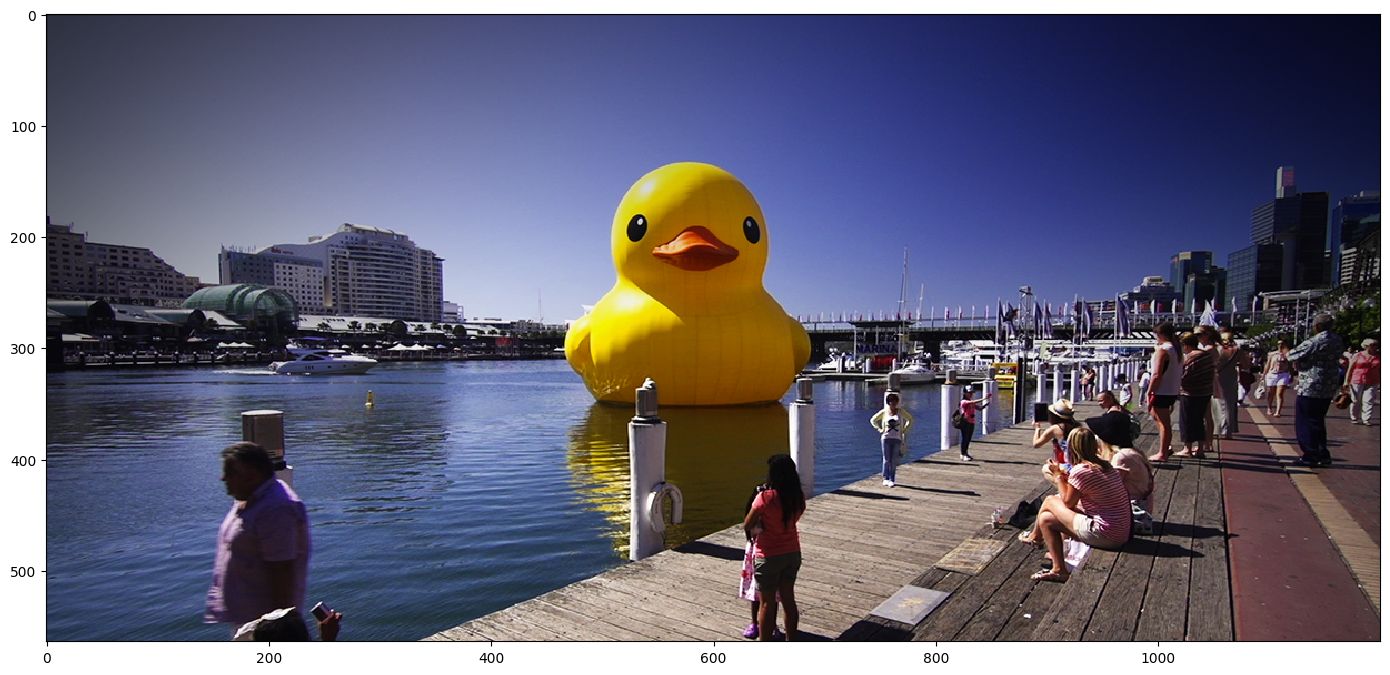

(564, 1200, 3)


In [8]:
# load the image and confirm skimage is imported properly.
image = io.imread('data/small_duck.jpg')
io.imshow(image)
io.show()
print(image.shape)

This single image has over 2 million values. Make sure your code is vectorized and efficient!

In [9]:
# save the dimensions of the image and reshape it for easier manipulation
rows = image.shape[0]
cols = image.shape[1]
image = image.reshape(image.shape[0]*image.shape[1],3)
print(image.shape)

(676800, 3)


## Random centroids (15 points)

Each centroid is a point in RGB space (color) in the image. This function should uniformly pick `k` centroids from the dataset.

Open the file `hw6.py` and complete the function `get_random_centroids`.

This function should take as input a single image of shape `(num_pixels, 3)` and `k`, the number of centroids. Notice we are flattening the image to a two dimensional array for easier manipulation. This function should return randomly chosen centroids of shape `(k,3)` as a numpy array. Make sure you are choosing different values.

In [13]:
from hw6 import get_random_centroids

k = 5
centroids = get_random_centroids(image, k)
centroids

array([[142., 152., 203.],
       [ 35.,  44.,  61.],
       [ 79.,  53.,  54.],
       [ 95.,  80.,  75.],
       [ 50.,  59., 126.]])

## Distance function (25 points)

The Minkowski distance is a metric which can be considered as a generalization of the Euclidean and Manhattan distances. 

The Minkoski distance of order $p$ between two points: $\vec{x}=(x_1, ..., x_n)$ and $\vec{y}=(y_1, ..., y_n)$ is:
$$D(\vec{x},\vec{y}) = (\sum_{i=1}^n \mid x_i - y_i \mid ^p)^{\frac{1}{p}}$$

Open the file `hw6.py` and complete the function `lp_distance`.

Inputs: 
* a single image of shape `(num_pixels, 3)`.
* the centroids `(k, 3)`.
* the distance parameter p.

Output: numpy array of shape `(k, num_pixels)` thats holds the distances of all points in RGB space from all centroids.

In [14]:
from hw6 import lp_distance

## Kmeans algorithm (40 points)

Calculate the locally optimal centroids as learned in class. At each iteration, assign every RGB point to its closest centroid and calculate new centroids by averaging the points that were assigned to every centroid. This function stops, when no improvement was made or once max_iter iterations is reached.

A reasonable implementation runs on a Core i7 CPU in less than a minute with `k=16`.

Open the file `hw6.py` and complete the function `kmeans`.

Inputs:
- X: a single image of shape (num_pixels, 3).
- k: number of centroids.
- p: the parameter governing the distance measure.
- max_iter: the maximum number of iterations to perform. (default value = 100).

Outputs:
- The calculated centroids as a numpy array.
- The final assignment of all RGB points to the closest centroids as a numpy array.
"""


In [15]:
from hw6 import kmeans

In [16]:
%%time
centroids, classes = kmeans(image, k=15, p=2, max_iter=100)

CPU times: total: 1min 16s
Wall time: 1min 19s


We obtained the locally optimal centroids (colors) from our image. To reconstruct the compressed image, we need to specify the color for each pixel that our algorithm associated with a centroid. The following cell does that for you.

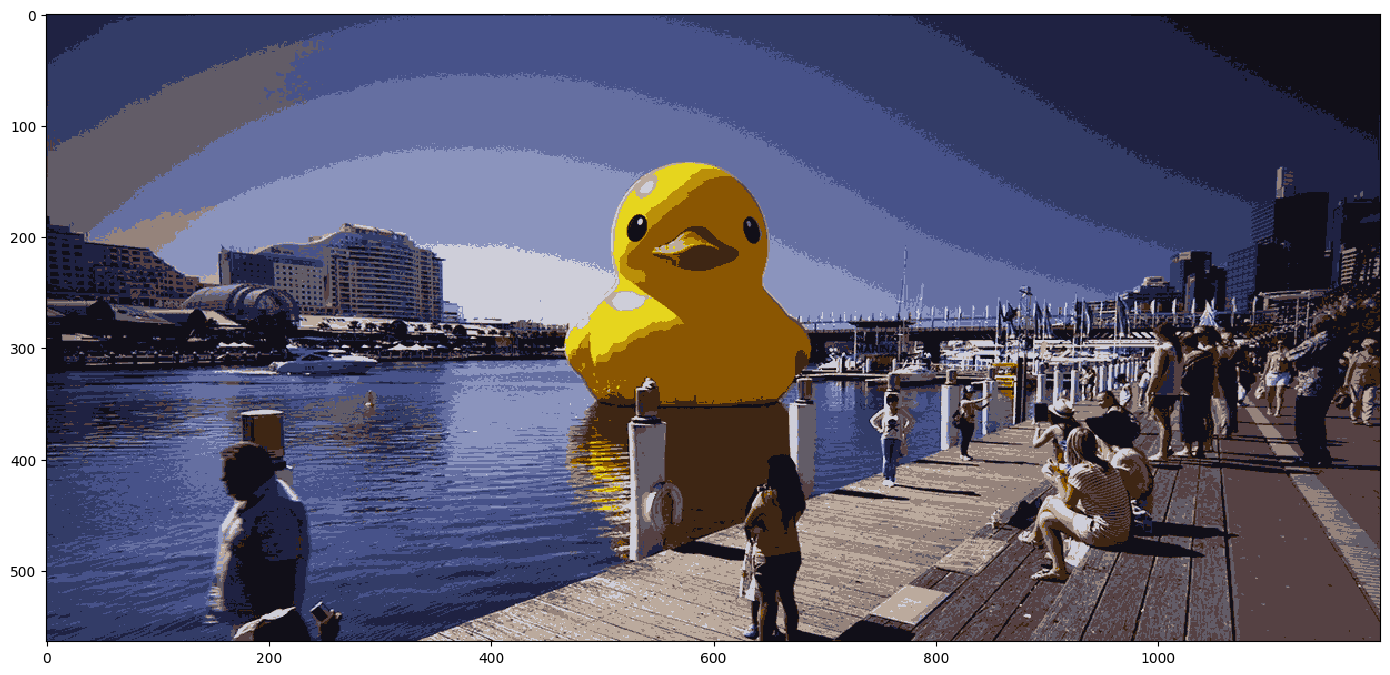

In [18]:
classes = classes.reshape(rows,cols) 
compressed_image = np.zeros((classes.shape[0], classes.shape[1],3), dtype=np.uint8)
for i in range(classes.shape[0]):
    for j in range(classes.shape[1]):
            compressed_image[i,j,:] = centroids[classes[i,j],:]
io.imshow(compressed_image)
io.show()

## Kmeans++ (20 points)


Open the file `hw6.py` and complete the function `kmeans_pp`. 

kmeans++ is an algorithm for choosing the initial centroids for the k-means clustering algorithm.

The idea is as follows:

1. Choose a centroid uniformly at random among the data points.
2. For each data points not chosen yet, compute the distance between the data point and the single nearest centroid that had already been chosen.
3. Choose one new data point at random as a new centroid, using a weighted probability distribution where a data point is chosen with probability proportional to the square of the distance you calculated previously. For each data point, the weight will be equal to the square distance to the closest center divided by the total squared distance (to make sure the probability adds up to 1).
4. Repeat Steps 2 and 3 until k centroids have been chosen.
5. Now that the initial centroids have been chosen, proceed using standard k-means clustering.

Inputs:
- X: a single image of shape (num_pixels, 3).
- k: number of centroids.
- p: the parameter governing the distance measure.
- max_iter: the maximum number of iterations to perform. (default value = 100).

Outputs:
- The calculated centroids as a numpy array.
- The final assignment of all RGB points to the closest centroids as a numpy array.|
"""

Run each algorithm (kmeans, kmeans++) 10 times and visualize the performance differences. Note, `kmeans_pp` should be implemented in the file `hw6.py`, but the visualization can either by implemented in the file `hw6.py` or in the notebook itself. Explain your results in a markdown cell.

In [19]:
# from hw6 import get_distributed_centroids
# get_distributed_centroids(image, 4, 2)

In [20]:
from hw6 import kmeans_pp

In [21]:
%%time
centroids, classes = kmeans_pp(image, k=10, p=2, max_iter=100)

CPU times: total: 52.3 s
Wall time: 55.1 s


|Again, we can visualize the resulted image.

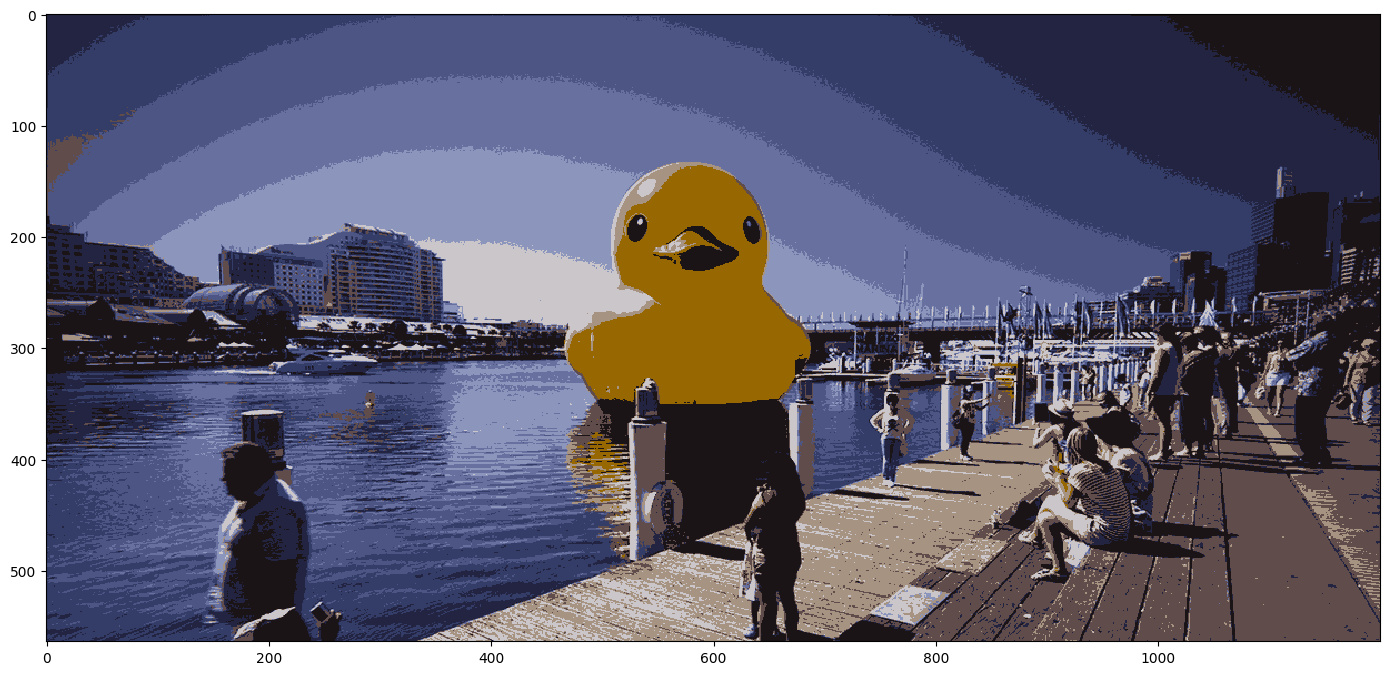

In [22]:
classes = classes.reshape(rows,cols) 
compressed_image = np.zeros((classes.shape[0], classes.shape[1],3), dtype=np.uint8)
for i in range(classes.shape[0]):
    for j in range(classes.shape[1]):
            compressed_image[i,j,:] = centroids[classes[i,j],:]
io.imshow(compressed_image)
io.show()

Don't forget to compare the results of kmeans with the improved kmeans++ and to explain your results in a markdown cell.

In [73]:
from hw6 import inertia

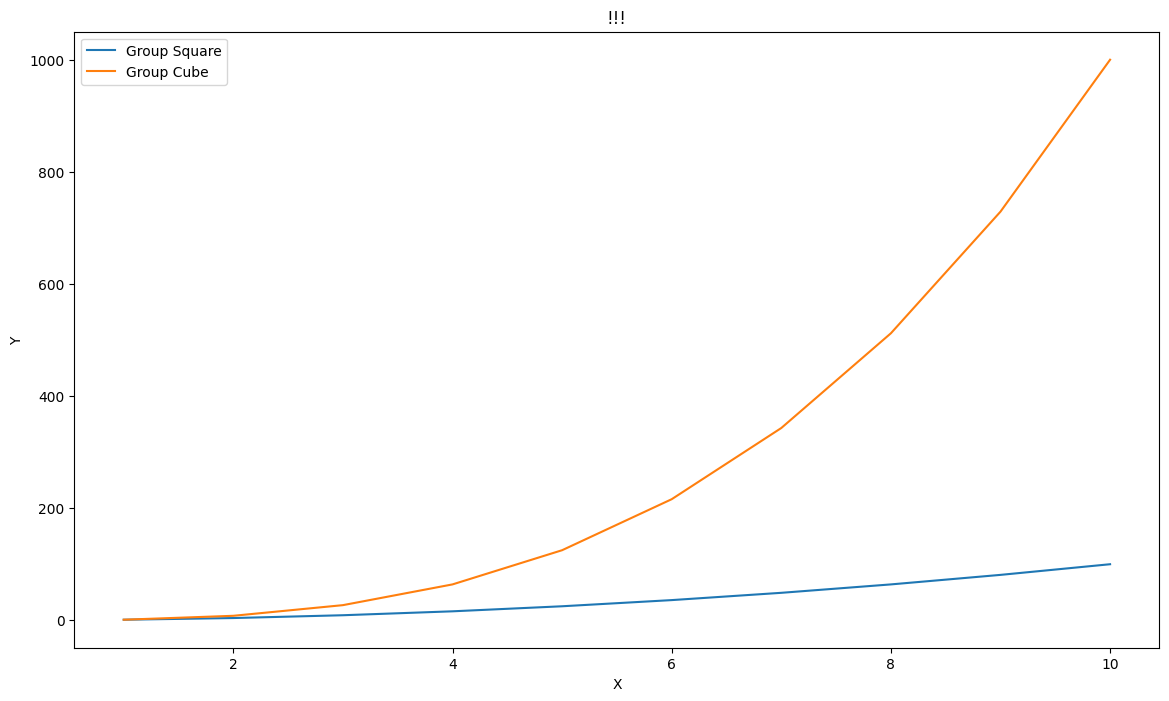

In [71]:
# Create the array
data_array = np.zeros((10, 3))
data_array[:, 0] = np.arange(1, 11)
data_array[:, 1] = data_array[:, 0] ** 2
data_array[:, 2] = data_array[:, 0] ** 3

# Convert to DataFrame
df = pd.DataFrame(data_array, columns=['X', 'Square', 'Cube'])

# Melt the DataFrame
df_melted = pd.melt(df, id_vars=['X'], var_name='Function', value_name='Value')

def draw_line_plot(data_array, x_axis_title='X', y_axis_title='Y', title=''):
    groups = data_array.iloc[:, 1].unique()

    fig, ax = plt.subplots()

    for group in groups:
        group_data = data_array[data_array.iloc[:, 1] == group]
        ax.plot(group_data.iloc[:, 0], group_data.iloc[:, 2], label=f'Group {group}')

    ax.set_xlabel(x_axis_title)
    ax.set_ylabel(y_axis_title)
    ax.legend()
    plt.title(title)
    plt.show()

draw_line_plot(df_melted, title='!!!')

In [72]:
df_melted

,X,Function,Value
0,1.0,Square,1.0
1,2.0,Square,4.0
2,3.0,Square,9.0
3,4.0,Square,16.0
4,5.0,Square,25.0
5,6.0,Square,36.0
6,7.0,Square,49.0
7,8.0,Square,64.0
8,9.0,Square,81.0
9,10.0,Square,100.0


In [90]:
image

array([[62, 64, 85],
       [46, 49, 64],
       [53, 56, 73],
       ...,
       [74, 49, 52],
       [73, 51, 53],
       [75, 53, 55]], dtype=uint8)

In [ ]:
results_dict = {'K':[], 'Algorithm':[], 'Inertia': []}
algorithms = [kmeans, kmeans_pp]
for k in range(2,15):

        for algo, algo_name in zip(algorithms, ['K-means', 'K-means++']):
            results_dict['K'].append(k)
            results_dict['Algorithm'].append(algo_name)
            centroids, classes = algo(image, k=k, p=2, max_iter=100)
            results_dict['Inertia'].append(inertia(image, centroids, 2))
df = pd.DataFrame(results_dict, columns=['K', 'Algorithm', 'Inertia'])

[[2.11273404e+08 1.37090963e+05]
 [5.16124407e+08 2.87593008e+04]
 [3.56298765e+08 1.03830529e+03]
 ...
 [4.45784805e+08 4.21089922e+05]
 [4.28140725e+08 3.23883715e+05]
 [3.89370720e+08 3.24923477e+05]]
[137090.96312389  28759.30084588   1038.30528894 ... 421089.92224708
 323883.71452865 324923.47709882]
[[2.11026320e+08 1.37724107e+05]
 [5.15645347e+08 2.85998394e+04]
 [3.55935096e+08 1.04543213e+03]
 ...
 [4.45386486e+08 4.20427240e+05]
 [4.27753247e+08 3.23373739e+05]
 [3.89010901e+08 3.24577317e+05]]
[137724.10726829  28599.83941751   1045.43212579 ... 420427.24016275
 323373.7387668  324577.31682628]
[[2.26355834e+08 1.86321351e+05 2.07340856e+08]
 [2.91799307e+08 1.72406126e+04 5.09729848e+08]
 [2.52716314e+08 1.70510642e+03 3.51180549e+08]
 ...
 [1.18107737e+08 1.04342932e+06 4.49454740e+08]
 [1.18311612e+08 8.70759879e+05 4.31549291e+08]
 [1.10522078e+08 9.06263742e+05 3.92825551e+08]]
[ 186321.35134535   17240.61263552    1705.1064215  ... 1043429.32023278
  870759.87920389  

In [ ]:
draw_line_plot(df)

In [93]:
centroids, classes = kmeans_pp(image, k=2, p=2, max_iter=100)
inertia(image, centroids, 2)

[[2.11026320e+08 1.37724107e+05]
 [5.15645347e+08 2.85998394e+04]
 [3.55935096e+08 1.04543213e+03]
 ...
 [4.45386486e+08 4.20427240e+05]
 [4.27753247e+08 3.23373739e+05]
 [3.89010901e+08 3.24577317e+05]]
[137724.10726829  28599.83941751   1045.43212579 ... 420427.24016275
 323373.7387668  324577.31682628]


26303464261972.117

In